## PIMA Indian Diabetes Data - UCI

!pip install graphviz

In [4]:
!conda install --yes python-graphviz
#!conda install --yes graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import graphviz

### Problem Statement - Predict the onset of diabetes based on diagnostic measures

#### Introduction
The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In the recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes and for this reason they have been subject of many studies.

#### Dataset Description

The dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within few years.

It includes data from 768 women with 8 characteristics:

Fields description follow:

PregnantFreq = Number of times pregnant

PlasmaGlucose = Plasma glucose concentration in 2 hours in an oral glucose tolerance test

DiastolicBP = Diastolic blood pressure (mm Hg)

TricepSkinThickness = Triceps skin fold thickness (mm)

SerumInsulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigree = Diabetes pedigree function

Age = Age (years)

Target = Class variable (1: tested positive for diabetes, 0: tested negative for diabetes)

### Reading data with predefined column names

In [6]:
diabetes=pd.read_csv('processed_diabetes.csv')

In [7]:
diabetes.head(10)

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Target
0,6,148.0,72.000000,35.00000,155.548223,33.593750,0.626953,C,1
1,1,85.0,66.000000,29.00000,155.548223,26.593750,0.351074,B,0
2,8,183.0,64.000000,29.15342,155.548223,23.296875,0.671875,B,1
3,1,89.0,66.000000,23.00000,94.000000,28.093750,0.166992,A,0
4,0,137.0,40.000000,35.00000,168.000000,43.093750,2.287109,B,1
5,5,116.0,74.000000,29.15342,155.548223,25.593750,0.201050,B,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248047,B,1
7,10,115.0,72.405184,29.15342,155.548223,35.312500,0.134033,B,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.157959,C,1
9,8,125.0,96.000000,29.15342,155.548223,32.457852,0.232056,C,1


# Data Exploration

### Check summary statistics

In [8]:
diabetes.describe()

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457852,0.471871,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875720,0.331308,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.203125,0.078003,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243774,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.406250,0.372559,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.593750,0.626221,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.125000,2.419922,1.000000


In [9]:
diabetes.isnull().sum()

PregnantFreq           0
PlasmaGlucose          0
DiastolicBP            0
TricepSkinThickness    0
SerumInsulin           0
BMI                    0
DiabetesPedigree       0
Age                    0
Target                 0
dtype: int64

### Check if the data types are as expected

In [10]:
diabetes.dtypes

PregnantFreq             int64
PlasmaGlucose          float64
DiastolicBP            float64
TricepSkinThickness    float64
SerumInsulin           float64
BMI                    float64
DiabetesPedigree       float64
Age                     object
Target                   int64
dtype: object

#### Changing "Target" datatype to categorical

In [11]:
diabetes['Target'] = diabetes['Target'].astype('category')

#### Changing "Age" datatype to categorical

In [12]:
diabetes['Age'] = diabetes['Age'].astype('category')

### Check target distribution

In [13]:
sns.countplot(diabetes['Target'])

<IPython.core.display.Javascript object>

#### Correlation Matrix

In [14]:
corr=diabetes.corr()
corr

,PregnantFreq,PlasmaGlucose,DiastolicBP,TricepSkinThickness,SerumInsulin,BMI,DiabetesPedigree
PregnantFreq,1.000000,0.127911,0.208522,0.082989,0.056027,0.021524,-0.033514
PlasmaGlucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230946,0.137062
DiastolicBP,0.208522,0.218367,1.000000,0.192816,0.072517,0.281282,-0.002725
TricepSkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542338,0.100969
SerumInsulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166531,0.098614
BMI,0.021524,0.230946,0.281282,0.542338,0.166531,1.000000,0.153411
DiabetesPedigree,-0.033514,0.137062,-0.002725,0.100969,0.098614,0.153411,1.000000


#### Correlation Plot

In [15]:
fig, ax = plt.subplots()

sns.heatmap(corr, cmap='coolwarm',annot=True, linewidths=2)

<IPython.core.display.Javascript object>

#### Applying dummification to categorical attributes

In [16]:
pd.value_counts(diabetes['Age'])

B    342
A    219
C    207
Name: Age, dtype: int64

In [17]:
cols_to_transform = ['Age']
data = pd.get_dummies(data = diabetes, prefix= cols_to_transform, prefix_sep='_', drop_first=False, columns=cols_to_transform)
data.dtypes

PregnantFreq              int64
PlasmaGlucose           float64
DiastolicBP             float64
TricepSkinThickness     float64
SerumInsulin            float64
BMI                     float64
DiabetesPedigree        float64
Target                 category
Age_A                     uint8
Age_B                     uint8
Age_C                     uint8
dtype: object

### Decouple target from the features

In [18]:
X = data[data.columns.difference(['Target'])]
print(X.shape)
y = data['Target']
print(y.shape)

(768, 10)
(768,)


### Test-Train split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [20]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (537, 10)
y_train (537,)
X_test (231, 10)
y_test (231,)


# Decision Trees

In [21]:
X_train.head()

,Age_A,Age_B,Age_C,BMI,DiabetesPedigree,DiastolicBP,PlasmaGlucose,PregnantFreq,SerumInsulin,TricepSkinThickness
334,1,0,0,23.90625,0.260010,60.0,95.0,1,58.0,18.0
139,0,1,0,36.90625,0.159058,72.0,105.0,5,325.0,29.0
485,1,0,0,42.31250,0.364990,68.0,135.0,0,250.0,42.0
547,0,1,0,33.09375,0.160034,68.0,131.0,4,166.0,21.0
18,0,1,0,43.31250,0.182983,30.0,103.0,1,83.0,38.0


In [22]:
diabetes.dtypes

PregnantFreq              int64
PlasmaGlucose           float64
DiastolicBP             float64
TricepSkinThickness     float64
SerumInsulin            float64
BMI                     float64
DiabetesPedigree        float64
Age                    category
Target                 category
dtype: object

### Model 1 - default parameters

In [23]:
       ## Training Model
from sklearn import tree
dt1_gini = tree.DecisionTreeClassifier()
dt1_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Checking accuracy

In [24]:
from sklearn.metrics import accuracy_score
y_predict = dt1_gini.predict(X_test)
print(accuracy_score(y_predict, y_test))
print('Train Accuracy : ',dt1_gini.score(X_train,y_train))
print('Test Accuracy :', dt1_gini.score(X_test,y_test))

0.70995670995671
Train Accuracy :  1.0
Test Accuracy : 0.70995670995671


## Confusion Matrix and Classification Report

In [25]:
from sklearn.metrics import confusion_matrix


print("Train - Confusion Matrix")
print(confusion_matrix(y_train,dt1_gini.predict(X_train)))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,dt1_gini.predict(X_test)))

Train - Confusion Matrix
[[349   0]
 [  0 188]]
Test - Confusion Matrix
[[117  34]
 [ 33  47]]


### Any observations in the previous model? 

#### Parameters
* criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

* min_samples_split : int, float, optional (default=2) -
    The minimum number of samples required to split an internal node.

* max_depth : int or None, optional (default=None) -
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_leaf : int, float, optional (default=1) -
    The minimum number of samples required to be at a leaf node.

* max_leaf_nodes : int or None, optional (default=None) -
    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

## Important variables

In [26]:
features = X_train.columns
importances = dt1_gini.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9
0,PlasmaGlucose,BMI,PregnantFreq,DiabetesPedigree,SerumInsulin,DiastolicBP,TricepSkinThickness,Age_A,Age_C,Age_B
1,0.364313,0.179586,0.111781,0.0974498,0.0756674,0.0649038,0.0413235,0.0285535,0.022635,0.0137869


In [27]:
importances

array([0.02855351, 0.01378695, 0.02263503, 0.17958641, 0.09744979,
       0.06490382, 0.36431251, 0.11178108, 0.07566742, 0.04132348])

<IPython.core.display.Javascript object>


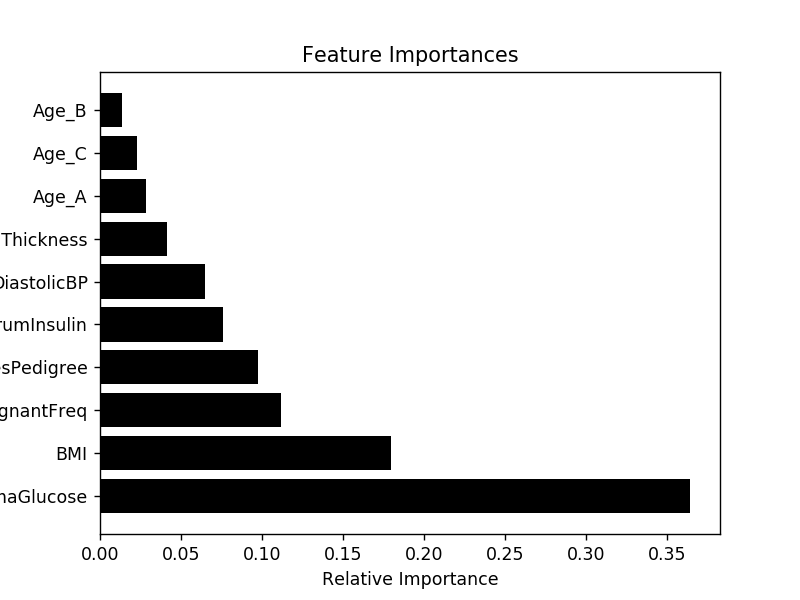

In [39]:
fig, ax = plt.subplots()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Building Decision Tree Model using Variable Importance

In [29]:
indices

array([6, 3, 7, 4, 8, 5, 9, 0, 2, 1], dtype=int64)

In [30]:
select= indices[0:5]
imp_tree =  tree.DecisionTreeClassifier(max_depth=3)
clf = imp_tree.fit(X_train.iloc[:,select], y_train)

In [31]:
train_pred = imp_tree.predict(X_train.iloc[:, select])
test_pred = imp_tree.predict(X_test.iloc[:,select])

### Checking accuracy

In [32]:
print('Train Accuracy =',imp_tree.score(X_train.iloc[:,select], y_train))
print('Test Accuracy =',imp_tree.score(X_test.iloc[:,select], y_test))

Train Accuracy = 0.7635009310986964
Test Accuracy = 0.7186147186147186


## Confusion Matrix and Classification Report

In [33]:
from sklearn.metrics import confusion_matrix


print("Train - Confusion Matrix")
print(confusion_matrix(y_train,imp_tree.predict(X_train.iloc[:,select])))

print("Test - Confusion Matrix")
print(confusion_matrix(y_test,imp_tree.predict(X_test.iloc[:,select])))

Train - Confusion Matrix
[[342   7]
 [120  68]]
Test - Confusion Matrix
[[141  10]
 [ 55  25]]


### Model 2
1. Entropy based splits
2. Max tree depth = 5

In [34]:
dt3_fraction15=tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)
clf1 = dt3_fraction15.fit(X_train.iloc[:,select],y_train)

In [35]:
train_pred = dt3_fraction15.predict(X_train.iloc[:,select])
test_pred = dt3_fraction15.predict(X_test.iloc[:,select])

In [36]:
print('Train Accuracy',dt3_fraction15.score(X_train.iloc[:,select], y_train))
print('Test Accuracy', dt3_fraction15.score(X_test.iloc[:,select], y_test))

Train Accuracy 0.7597765363128491
Test Accuracy 0.7186147186147186


dot_data = tree.export_graphviz(dt2_entropy, out_file=None,feature_names=X.columns,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("dt2_entropy_maxdept5") 

### Model 3
1. Entropy based splits
2. max_leaf_nodes

### Which model/parameters to choose for best accuracy?
### Will the model be really stable?

## Randomized Hyper-parameter search with cross-validation

In [37]:
# Randomized search on hyper parameters

from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

### Type the code here
dt = tree.DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'], 'max_leaf_nodes':np.arange(5,30,1), 'max_depth':np.arange(3,15,1)}

rsearch_acc = RandomizedSearchCV(estimator=dt, param_distributions=param_grid, n_iter=500)

rsearch_acc.fit(X_train.iloc[:,select], y_train)

print(rsearch_acc.best_estimator_)
print('Train Accuracy =',rsearch_acc.best_score_)
print('Test Accuracy =',rsearch_acc.score(X_test.iloc[:,select], y_test))
print("Train - Confusion Matrix")
print(confusion_matrix(y_train,rsearch_acc.predict(X_train.iloc[:,select])))
print("Test - Confusion Matrix")
print(confusion_matrix(y_test,rsearch_acc.predict(X_test.iloc[:,select])))


C:\Users\AG538XK\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Train Accuracy = 0.7597765363128491
Test Accuracy = 0.7445887445887446
Train - Confusion Matrix
[[331  18]
 [ 75 113]]
Test - Confusion Matrix
[[131  20]
 [ 39  41]]


In [57]:
dot_data= tree.export_graphviz(rsearch_acc.best_estimator_, out_file=None,  feature_names=X_train.iloc[0,select], class_names=['0','1'], filled=True, rounded=True)
graph=graphviz.Source(dot_data)
graph
#graph.render('pima')

import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
dot_data = tree.export_graphviz(rsearch_acc.best_estimator_, 
out_file=None, feature_names = X_train.columns, 
class_names = ['0','1'], filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph
graph.render("pima")


ValueError: Length of feature_names, 10 does not match number of features, 5

### Making predictions

In [51]:
predicted= pd.DataFrame(rsearch_acc.predict(X_test.iloc[:,select]))
data['predicted'] = predicted
data.to_csv("diabetes_predictions.csv")

## Build KNN model

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = 7
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(X_train,y_train)
print("Training Accuracy : ",knn.score(X_train,y_train))
print('Test Accuracy: ',knn.score(X_test,y_test))  
 


Training Accuracy :  0.8119180633147114
Test Accuracy:  0.7056277056277056


### Try Grid search CV for parameters in KNN